In [1]:
import numpy as np
import ppopt.critical_region
from ppopt.mpmodel import MPModeler
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.plot import parametric_plot
from numpy.polynomial.legendre import leggauss
import copy
from typing import Union
from collections import defaultdict

In [2]:
# m = MPModeler()
# 
# u = m.add_var(name='u')
# x = m.add_var(name='x')
# z = m.add_var(name='z')
# 
# t1 = m.add_param(name='t1')
# t2 = m.add_param(name='t2')
# d1 = m.add_param(name='d1')
# d2 = m.add_param(name='d2')

In [3]:
# m.add_constr(2*x - 3*z + t1 - d2 == 0)
# m.add_constr(x - z/2 -t1/2 +t2/2 +d1 -7*d2/2 <= u)
# m.add_constr(-2*x +2*z -4*t1/3 -t2 +2*d2 +1/3<= u)
# m.add_constr(-x + 5*z/2 +t1/2 -t2 -d1 +d2/2 -1 <= u)
# m.add_constr(-50 <= x)
# m.add_constr(0-50 <= z)
# m.add_constr(0 <= t1)
# m.add_constr(0 <= t2)
# m.add_constr(0 <= d1)
# m.add_constr(0 <= d2)
# m.add_constr(t1 <= 4)
# m.add_constr(t2 <= 4)
# m.add_constr(d1 <= 5)
# m.add_constr(d2 <= 5)

In [4]:
# m.set_objective(u)

In [5]:
# prob = m.formulate_problem()
# prob.process_constraints()

In [6]:
# solution = solve_mpqp(problem=prob, algorithm=mpqp_algorithm.combinatorial)

In [7]:
# psi_matrix = np.empty((len(solution), solution.critical_regions[0].A.shape[1] + solution.critical_regions[0].b.shape[1]))
# psi_idx = 0

In [8]:
# psi_matrix

In [9]:
# np.concatenate([solution.critical_regions[0].A[0,:], solution.critical_regions[0].b[0,:]], axis=0)

In [10]:
# for i in range(len(solution.critical_regions)):
#     psi_matrix[i] = np.concatenate([solution.critical_regions[i].A[psi_idx,:], solution.critical_regions[i].b[psi_idx,:]], axis=0)

In [11]:
# psi_matrix

In [12]:
m_t1 = MPModeler()

t1_max = m_t1.add_var('t1_max')
t1_min = m_t1.add_var('t1_min')
t2_a = m_t1.add_var('t2_a')
t2_b = m_t1.add_var('t2_b')

d1 = m_t1.add_param('d1')
d2 = m_t1.add_param('d2')

In [13]:
m_t1.add_constr(-2/3*t1_min - 1/4*t2_a +1/2*d1 - d2 +1/6 <= 0)
m_t1.add_constr(1/3*t1_min -t2_a -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t1.add_constr(-2/3*t1_max - 1/4*t2_b +1/2*d1 - d2 +1/6 <= 0)
m_t1.add_constr(1/3*t1_max -t2_b -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t1.add_constr(0 <= t1_max)
m_t1.add_constr(t1_max <= 4)
m_t1.add_constr(0 <= t1_min)
m_t1.add_constr(t1_min <= 4)
m_t1.add_constr(t1_min <= t1_max)

m_t1.add_constr(0 <= t2_a)
m_t1.add_constr(t2_a <= 4)
m_t1.add_constr(0 <= t2_b)
m_t1.add_constr(t2_b <= 4)

m_t1.add_constr(0 <= d1)
m_t1.add_constr(0 <= d2)
m_t1.add_constr(d1 <= 5)
m_t1.add_constr(d2 <= 5)

In [14]:
m_t1.set_objective(t1_min-t1_max)

In [15]:
prob_t1 = m_t1.formulate_problem()
prob_t1.process_constraints()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-12-20


In [16]:
solution_t1 = solve_mpqp(problem=prob_t1, algorithm=mpqp_algorithm.geometric)

Using a found active set [5, 6, 10, 12]


In [17]:
print(f'Number of critical regions: {len(solution_t1)}')

Number of critical regions: 2


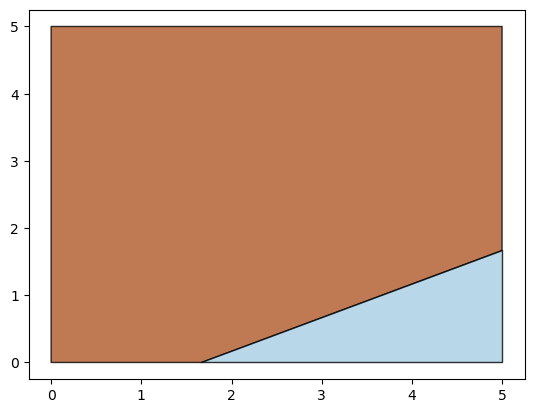

In [18]:
parametric_plot(solution_t1, show=True)

In [19]:
m_t2 = MPModeler()

t2_max = m_t2.add_var('t2_max')
t2_min = m_t2.add_var('t2_min')

t1 = m_t2.add_param('t1')
d1 = m_t2.add_param('d1')
d2 = m_t2.add_param('d2')

In [20]:
m_t2.add_constr(-2/3*t1 - 1/4*t2_max +1/2*d1 - d2 +1/6 <= 0)
m_t2.add_constr(1/3*t1 -t2_max -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t2.add_constr(-2/3*t1 - 1/4*t2_min +1/2*d1 - d2 +1/6 <= 0)
m_t2.add_constr(1/3*t1 -t2_min -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t2.add_constr(0 <= t2_max)
m_t2.add_constr(t2_max <= 4)
m_t2.add_constr(0 <= t2_min)
m_t2.add_constr(t2_min <= 4)
m_t2.add_constr(t2_min <= t2_max)

m_t2.add_constr(0 <= t1)
m_t2.add_constr(t1 <= 4)
m_t2.add_constr(0 <= d1)
m_t2.add_constr(0 <= d2)
m_t2.add_constr(d1 <= 5)
m_t2.add_constr(d2 <= 5)

In [21]:
m_t2.set_objective(-(t2_max-t2_min))

In [22]:
prob_t2 = m_t2.formulate_problem()
prob_t2.process_constraints()

In [23]:
solution_t2 = solve_mpqp(problem=prob_t2, algorithm=mpqp_algorithm.geometric)

Using a found active set [3, 5]


In [24]:
print(f'Number of critical regions: {len(solution_t2)}')

Number of critical regions: 3


In [25]:
# np.concatenate([crt2_list[2].A, crt2_list[2].b], axis=1)[:2, :]

In [26]:
def gauss_legendre_between_bounds(expr_coeffs: np.ndarray, n_gl: int, max_idx: int = 0, min_idx: int = 1):
    """
    Generate n Gauss–Legendre quadrature points and weights between min and max bounds
    defined by two linear expressions.

    Parameters:
        expr_coeffs (np.ndarray): 2xD array. Row 0 = max point coefficients, Row 1 = min.
        n (int): Number of quadrature points.

    Returns:
        points (np.ndarray): (n, D) array of quadrature points.
        weights (np.ndarray): (n,) array of weights.
    """
    if expr_coeffs.shape[0] != 2:
        raise ValueError("expr_coeffs must have two rows")

    max_coeffs = expr_coeffs[max_idx]
    min_coeffs = expr_coeffs[min_idx]

    # Get Gauss–Legendre points and weights on [-1, 1]
    nodes, weights = leggauss(n_gl)
    weights = weights.reshape(-1,1)
    
    # Affine transformation to domain [min_coeffs, max_coeffs]
    points = 0.5 * (np.outer((nodes + 1), max_coeffs) + np.outer((1 - nodes), min_coeffs))

    # Adjust weights to match new domain
    weights = 0.5 * weights@(max_coeffs - min_coeffs).reshape(1,-1)

    return points, weights


In [27]:
# # Example: 2D line segment from [0,0] (min) to [1,1] (max)
# # coeffs = np.array([
# #     [0, 0, 4],  # max point
# #     [0, 0, 0],  # min point
# # ])
# 
# coeffs = np.array([
#     [0, 0, 4],
#     [0.75,-1.5,-1.25]
# ])
# 
# # coeffs = np.array([
# #     [0.000000,0.0,0.0,4.000000],
# #     [-2.666667,2.0,-4.0,0.666667]
# # ])
# 
# points, weights = gauss_legendre_between_bounds(expr_coeffs=coeffs, n_gl=5)
# 
# print("Points Mapped:\n", points)
# print("Weights Mapped:\n", weights)

In [28]:
def recursive_defaultdict():
    return defaultdict(recursive_defaultdict)

In [29]:
def get_quadrature_solutions(solutions: list, nq: Union[list, int] = 5):
    """
    Computes Gauss-Legendre quadrature points and weights for each critical region 
    in a list of parametric solutions.

    Parameters:
    -----------
    solutions : list
        A list where each element is a parametric solution object
    
    nq : int or list of int, default=5
        Number of Gauss-Legendre points to use in the quadrature.
        If a list is provided, it must match the length of `solutions`,
        allowing different numbers of points for each theta

    Returns:
    --------
    qps : defaultdict
        Nested dictionary containing quadrature points for each theta (`t`) 
        and critical region (`cr`). Each entry includes:
            - 'data': the actual quadrature points
            - 'region': the associated critical region object

    qws : defaultdict
        Same structure as `qps`, but containing the corresponding quadrature weights.
    """
    # Initialize nested default dicts to store quadrature points and weights
    qps, qws = recursive_defaultdict(), recursive_defaultdict()

    # Loop over each theta
    for t in range(len(solutions)):
        # Extract list of critical regions for this solution
        cr_list = list(solutions[t].critical_regions)

        # Determine number of quadrature points for this theta
        nqs = nq[t] if isinstance(nq, list) else nq

        # Loop over each critical region
        for cr in range(len(cr_list)):
            # Extract coefficients (first 2 states) for defining integration bounds
            coeffs = np.concatenate([cr_list[cr].A, cr_list[cr].b], axis=1)[:2, :]

            # Compute quadrature points and weights for the critical region
            qps[f't{t+1}'][f'cr{cr+1}']['data'], qws[f't{t+1}'][f'cr{cr+1}']['data'] = \
                gauss_legendre_between_bounds(expr_coeffs=coeffs, n_gl=nqs)

            # Also store the region object for reference
            qps[f't{t+1}'][f'cr{cr+1}']['region'] = cr_list[cr]
            qws[f't{t+1}'][f'cr{cr+1}']['region'] = cr_list[cr]

    return qps, qws

In [30]:
qpoints, qweights = get_quadrature_solutions(solutions = [solution_t1], nq=5)

In [41]:
def get_quadrature_points(solution, nq: int, t_vector: np.ndarray):
    for region in solution.critical_regions:
        if region.is_inside(t_vector):
            coeffs = np.concatenate([region.A, region.b], axis=1)[:2, :]
            qpoints, qweights = gauss_legendre_between_bounds(expr_coeffs=coeffs, n_gl=nq)
            t_vector = np.concatenate([t_vector, np.array([1])], axis=0).reshape(-1,1)
            return qpoints@t_vector.reshape(-1,1), qweights@t_vector.reshape(-1,1)

In [42]:
d_vector = np.array([4, 0.5])

In [43]:
t1_points, t1_weights = get_quadrature_points(solution=solution_t1, nq=5, t_vector=d_vector)

In [44]:
t1_points

array([[1.14073023],
       [1.69229603],
       [2.5       ],
       [3.30770397],
       [3.85926977]])

In [45]:
t1_weights

array([[0.35539033],
       [0.71794301],
       [0.85333333],
       [0.71794301],
       [0.35539033]])

In [49]:
t2_points, t2_weights = defaultdict(dict), defaultdict(dict)
for t1_idx in range(len(t1_points)):
    t2_points[t1_idx], t2_weights[t1_idx] = get_quadrature_points(solution=solution_t2, nq=5, t_vector=np.block([t1_points[t1_idx], d_vector]))

In [51]:
t2_points

defaultdict(dict,
            {0: array([[3.64232383],
                    [3.71132114],
                    [3.81235969],
                    [3.91339824],
                    [3.98239556]]),
             1: array([[2.240479  ],
                    [2.5798984 ],
                    [3.07693862],
                    [3.57397884],
                    [3.91339824]]),
             2: array([[0.18764031],
                    [0.92306138],
                    [2.        ],
                    [3.07693862],
                    [3.81235969]]),
             3: array([[0.18764031],
                    [0.92306138],
                    [2.        ],
                    [3.07693862],
                    [3.81235969]]),
             4: array([[0.18764031],
                    [0.92306138],
                    [2.        ],
                    [3.07693862],
                    [3.81235969]])})

In [52]:
t2_weights

defaultdict(dict,
            {0: array([[0.04445703],
                    [0.08981003],
                    [0.10674649],
                    [0.08981003],
                    [0.04445703]]),
             1: array([[0.21869806],
                    [0.44180364],
                    [0.52511936],
                    [0.44180364],
                    [0.21869806]]),
             2: array([[0.47385377],
                    [0.95725734],
                    [1.13777778],
                    [0.95725734],
                    [0.47385377]]),
             3: array([[0.47385377],
                    [0.95725734],
                    [1.13777778],
                    [0.95725734],
                    [0.47385377]]),
             4: array([[0.47385377],
                    [0.95725734],
                    [1.13777778],
                    [0.95725734],
                    [0.47385377]])})

In [53]:
n=5
points, weights = np.polynomial.legendre.leggauss(n)
a, b = 3.62472, 4  # Example new interval

# Change of variable to map from [-1,1] to [a,b]
points_mapped = 0.5 * ((points + 1) * b + (1-points) * a)
weights_mapped = 0.5 * (b-a) * weights

print(f'Points Mapped: {points_mapped}\n')
print(f'Weights Mapped: {weights_mapped}')

Points Mapped: [3.64232441 3.71132162 3.81236    3.91339838 3.98239559]

Weights Mapped: [0.04445696 0.08980988 0.10674631 0.08980988 0.04445696]
